In [6]:
import matplotlib.pyplot as plt  
%matplotlib inline 
plt.rcParams['figure.figsize'] = 8,4
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline


In [7]:
shells_scatter = pd.read_csv('shells_scatter.csv')

In [8]:
shells_scatter.head()

,l,w
0,7.3,2.7
1,9.7,3.2
2,7.5,2.6
3,6.1,2.9
4,9.0,2.9


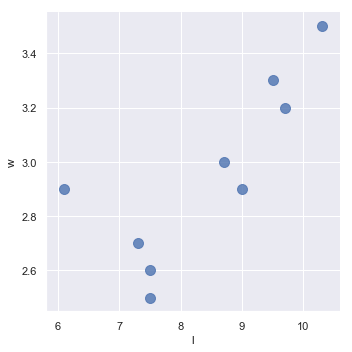

In [12]:
shells_plot = sns.lmplot(x = 'l', y = 'w', data = shells_scatter, fit_reg = False, size = 5, aspect = 1, scatter_kws={"s":100})

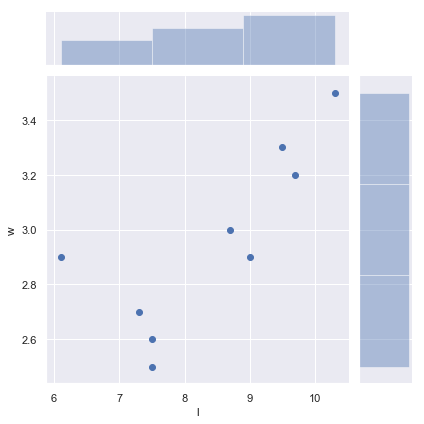

In [13]:
j = sns.jointplot(data=shells_scatter, x='l', y='w')

In [14]:
achievement = pd.read_csv('Achievement.csv')

In [15]:
achievement.head()

,Achievement,GPA
0,98,3.6
1,96,2.7
2,94,3.1
3,88,4.0
4,91,3.2


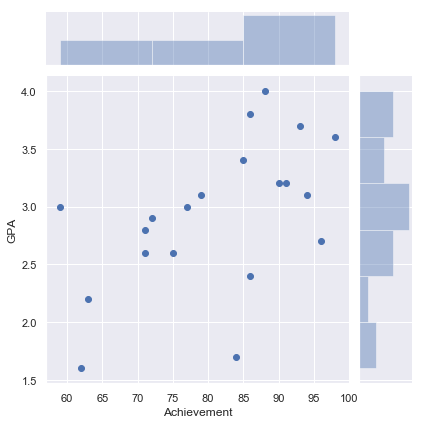

In [16]:
achievement_scatter = sns.jointplot(data=achievement, x='Achievement', y='GPA')

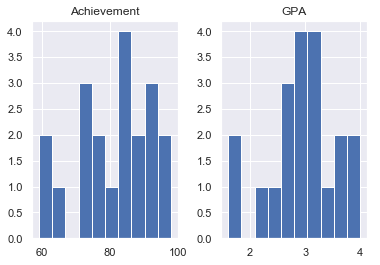

In [17]:
achievement.hist()
plt.show()

In [19]:
#Normality. Indicates data sets are normally distributed
from scipy import stats
stats.shapiro(achievement['Achievement'])

(0.9460626840591431, 0.3112420439720154)

In [20]:
stats.shapiro(achievement['GPA'])

(0.9678234457969666, 0.7084127068519592)

In [21]:
#Equal variances. Levene's score indicates not equal variances,therefore Spearman's rank correlation
from scipy.stats import levene
levene(achievement['Achievement'], achievement['GPA'])

LeveneResult(statistic=32.160015610502036, pvalue=1.6096344933619678e-06)

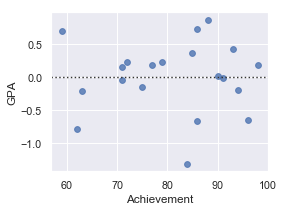

In [23]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
sns.residplot(achievement['Achievement'], achievement['GPA'])
plt.savefig("out.png")


In [24]:
#convert columns to arrays
import pandas as pd
achievement_arrayx = achievement[['Achievement']].values
achievement_arrayy = achievement['GPA'].values


In [26]:
print(achievement_arrayx)

[[98]
 [96]
 [94]
 [88]
 [91]
 [77]
 [86]
 [71]
 [59]
 [63]
 [84]
 [79]
 [75]
 [72]
 [86]
 [85]
 [71]
 [93]
 [90]
 [62]]


In [27]:
print(achievement_arrayy)

[3.6 2.7 3.1 4.  3.2 3.  3.8 2.6 3.  2.2 1.7 3.1 2.6 2.9 2.4 3.4 2.8 3.7
 3.2 1.6]


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(achievement_arrayx, achievement_arrayy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
model = LinearRegression().fit(achievement_arrayx, achievement_arrayy)

In [31]:
r_sq = model.score(achievement_arrayx, achievement_arrayy)
print('coefficient of determination:', r_sq)
#The percent a variability is relatively low. Only 27 percent of the achievement test performance is related to the 
#g.p.a (and vice versa). Seventy-three percent of the variability is left unexplained.

coefficient of determination: 0.2747097648601622


In [32]:
print('intercept:', model.intercept_)

intercept: 0.6271190295678544


In [33]:
print('slope:', model.coef_)

slope: [0.02843063]


In [38]:
#Once there is a satisfactory model, you can use it for predictions with either existing or new data
x_input = np.array(88).reshape(-1,1)
y_pred = model.predict(x_input) #Must be an array x input
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.1290144]


In [40]:
#Pearsons correlation coefficient. Only reliable for samples of n>100
from scipy.stats import spearmanr
data1 = achievement['Achievement']
data2 = achievement['GPA']
rho, pval = spearmanr(data1, data2)

In [41]:
print(rho)
print(pval)

0.5776188527813826
0.007650490968633971


In [42]:
#Two sample t-test
#Is there a significant (or only random) difference in the life satisfaction score between 
#older and younger people
#Pretend normality tests were done...
lifesatis = pd.read_csv('lifesatis.csv')

In [43]:
lifesatis.head()

,older,younger
0,45,34
1,38,22
2,52,15
3,48,27
4,25,37


In [44]:
stats.ttest_ind(lifesatis['older'], lifesatis['younger']) 
#statistic is the t obs
#t crit, from table, is df (10-1 and 10-1 = 18) and probability level (0.025 since two-sided)

Ttest_indResult(statistic=4.257546665558161, pvalue=0.0004736633119019225)

In [46]:
#mean of the specific column
lifesatis.loc[:,"older"].mean()

44.5

In [47]:
# standard deviation of the specific column
lifesatis.loc[:,"older"].std()

8.682677518420737

In [48]:
# variance of the specific column
lifesatis.loc[:,"older"].var()

75.38888888888889

In [49]:
#mean of the specific column
lifesatis.loc[:,"younger"].mean()

28.1

In [50]:
# standard deviation of the specific column
lifesatis.loc[:,"younger"].std()

8.543353491977777

In [51]:
# variance of the specific column
lifesatis.loc[:,"younger"].var()

72.98888888888888

In [52]:
#One-way ANOVA
#Pretend normality tests are done
depressants = pd.read_csv('depressants.csv')

In [53]:
depressants.head()

,placebo,low,mod
0,38,22,14
1,47,19,26
2,39,8,11
3,25,23,18
4,42,31,5


In [54]:
stats.f_oneway(depressants['placebo'], depressants['low'],depressants['mod'])
#Results presented as F = 11.26 (2,12) p < .01
#(2,12) are df
#F crit is top df and bottom df = 6.93

F_onewayResult(statistic=11.266565503287806, pvalue=0.0017606447622790665)

In [55]:
#Tukey post hoc HSD
stacked_data = depressants.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment_level',
                                            0:'result'})
# Show the first 8 rows:

print (stacked_data.head(8))

   id treatment_level  result
0   0         placebo      38
1   0             low      22
2   0             mod      14
3   1         placebo      47
4   1             low      19
5   1             mod      26
6   2         placebo      39
7   2             low       8


In [56]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment_level'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower    upper  reject
-----------------------------------------------
 low     mod     -5.8   -19.4906  7.8906 False 
 low   placebo   17.6    3.9094  31.2906  True 
 mod   placebo   23.4    9.7094  37.0906  True 
-----------------------------------------------


In [62]:
#one-way summary table
from statsmodels.formula.api import ols
depressants_model = ols('result ~ C(treatment_level)', data=stacked_data).fit()
depressants_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     11.27
Date:                Wed, 18 Dec 2019   Prob (F-statistic):            0.00176
Time:                        03:38:57   Log-Likelihood:                -51.022
No. Observations:                  15   AIC:                             108.0
Df Residuals:                      12   BIC:                             110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        20.6000      3.630      5.674      0.000      12.690      28.510
C(treatment_level)[T.mod]        -5.8000      5.134     -1.130      0.281     -16.986       5.386
C(treatment_level)[T.placebo]    17.6000      5.134      3.428      0.005       6.414      28.786
==============================================================================
Omnibus:                        0.510   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.547
Skew:                          -0.346   Prob(JB):                        0.761
Kurtosis:                       2.369   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""